In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('/content/ALT-TEXT.xlsx')
data

img url  ... latency
0    https://5.imimg.com/data5/AB/RM/HJ/SELLER-9698...  ...     611
1    https://triptins.com/wp-content/uploads/2020/1...  ...    2463
2    https://thumbs.dreamstime.com/b/man-eat-pizza-...  ...    1011
3    https://media1.popsugar-assets.com/files/thumb...  ...    1739
4    https://i2-prod.mirror.co.uk/incoming/article8...  ...    1224
..                                                 ...  ...     ...
194  https://previews.123rf.com/images/paylessimage...  ...    1969
195  https://c8.alamy.com/comp/2AP3W1X/man-holds-a-...  ...    1906
196  https://cdn.pixabay.com/photo/2013/02/22/16/31...  ...     483
197  https://previews.123rf.com/images/vadimgozhda/...  ...    2134
198  https://image.shutterstock.com/image-photo/bru...  ...    1165

[199 rows x 5 columns]

In [28]:
reference=[];
for i in data['alt text']:
  reference.append(str(i).split())

In [26]:
reference

[['Fresh', 'Rose', 'Flower'],
 ['snow', 'covered', 'mountain'],
 ['Man', 'eating', 'pizza'],
 ['Oldest', 'human', 'skeleton'],
 ['young', 'woman', 'is', 'eating', 'burger'],
 ['Skull', 'of', 'a', 'woman'],
 ['Handsome', 'Hungry', 'Man', 'Eating', 'Pizza'],
 ['woman', 'holding', 'a', 'baby', 'decorating', 'christmas', 'tree'],
 ['chocolate', 'birthday', 'cake'],
 ['tourist', 'walking', 'on', 'a', 'beach'],
 ['city', 'buildings'],
 ['mother', 'kissing', 'her', 'baby'],
 ['angry', 'woman'],
 ['A', 'baby', 'Monkey', 'eating', 'Banana', 'from', 'the', 'Trash'],
 ['lizard', 'on', 'the', 'wall'],
 ['sea', 'snake', 'quinching', 'its', 'thirst'],
 ['sky', 'scarpper', 'in', 'New', 'York'],
 ['yellow', 'and', 'black', 'snake', 'on', 'brown', 'concrete', 'floor'],
 ['old', 'man', 'holding', "alligator's", 'mouth'],
 ['Cashew', 'and', 'Almonds', 'in', 'a', 'Tray'],
 ['Senior', 'Man', 'Using', 'mobile', 'in', 'a', 'park'],
 ['Woman', 'holding', 'Rilfle', 'in', 'a', 'jungle'],
 ['a', 'family', 'havin

In [29]:
candidate=[];
for i in data['api-generated text ']:
  candidate.append(str(i).split())

In [37]:
import nltk
import nltk.translate.bleu_score as bleu

import math
import numpy
import os

try:
  nltk.data.find('tokenizers/punkt')
except LookupError:
  nltk.download('punkt')

In [41]:
blu=[]
for i in range(0,198):
  blu.append(bleu.sentence_bleu([reference[i]], candidate[i]))


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


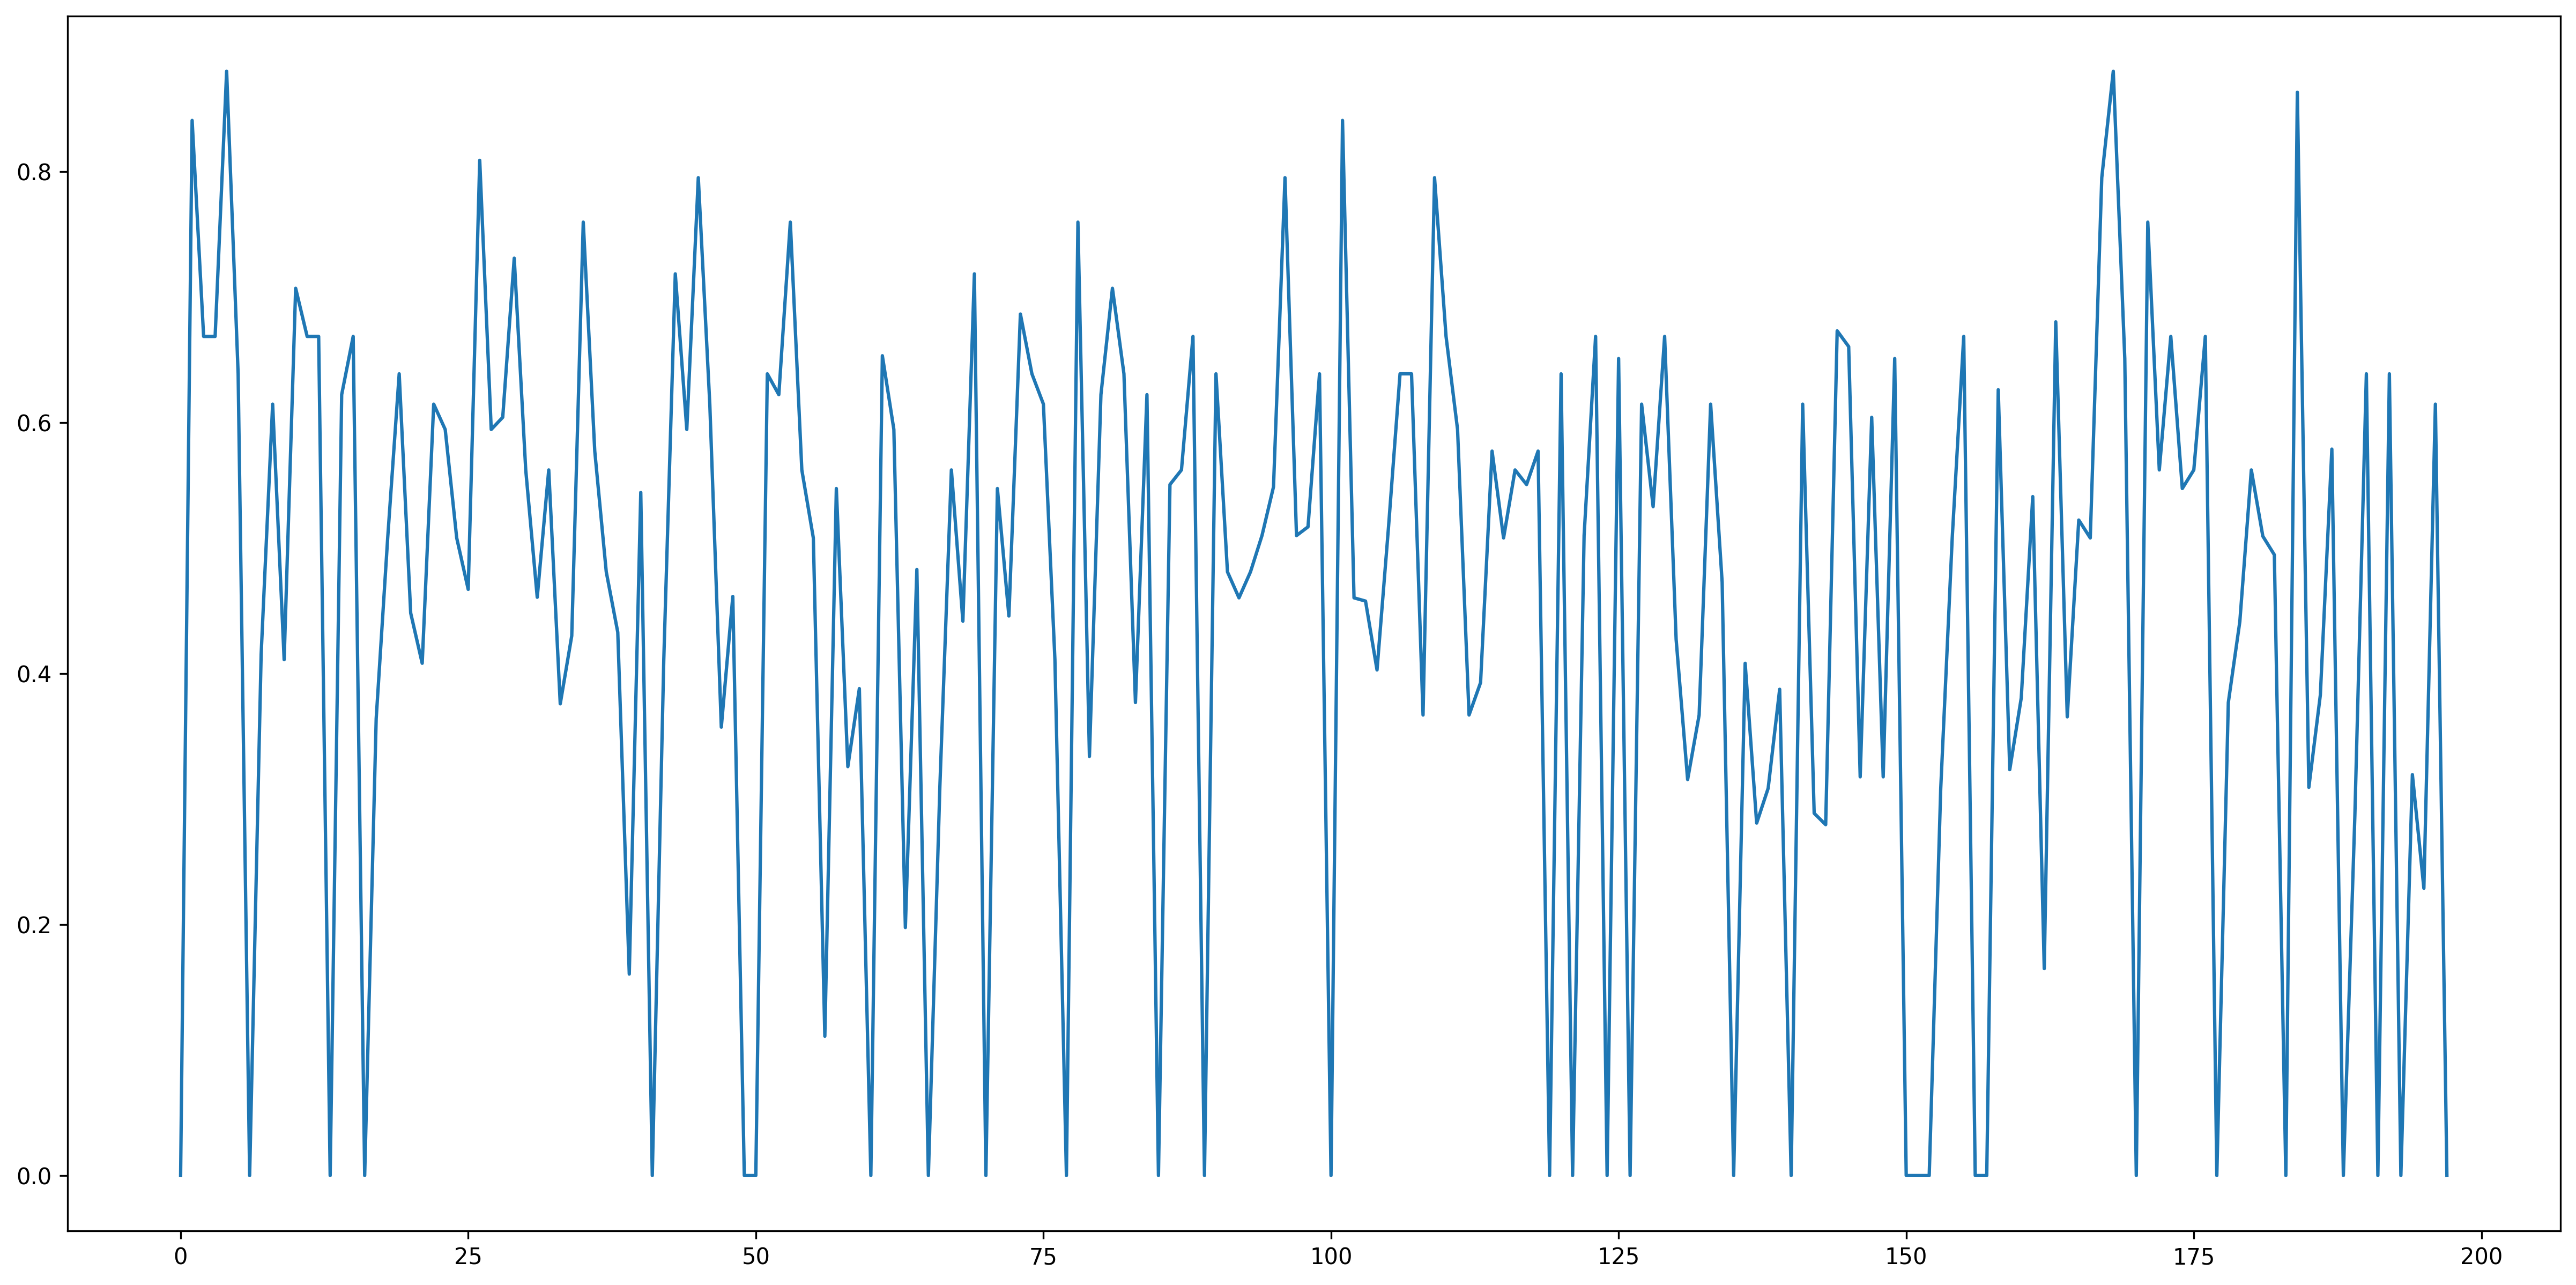

In [87]:
plt.figure(figsize=(20,10),dpi=300)
plt.plot(blu);

In [46]:
iscore1gram = []
iscore2gram = []
iscore3gram = []
iscore4gram = []
for i in range(199):
  iscore1gram.append(bleu.sentence_bleu([reference[i]], candidate[i], weights=(1,0,0,0)))
  iscore2gram.append(bleu.sentence_bleu([reference[i]], candidate[i], weights=(0,1,0,0)))
  iscore3gram.append(bleu.sentence_bleu([reference[i]], candidate[i], weights=(0,0,1,0)))
  iscore4gram.append(bleu.sentence_bleu([reference[i]], candidate[i], weights=(0,0,0,1)))


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


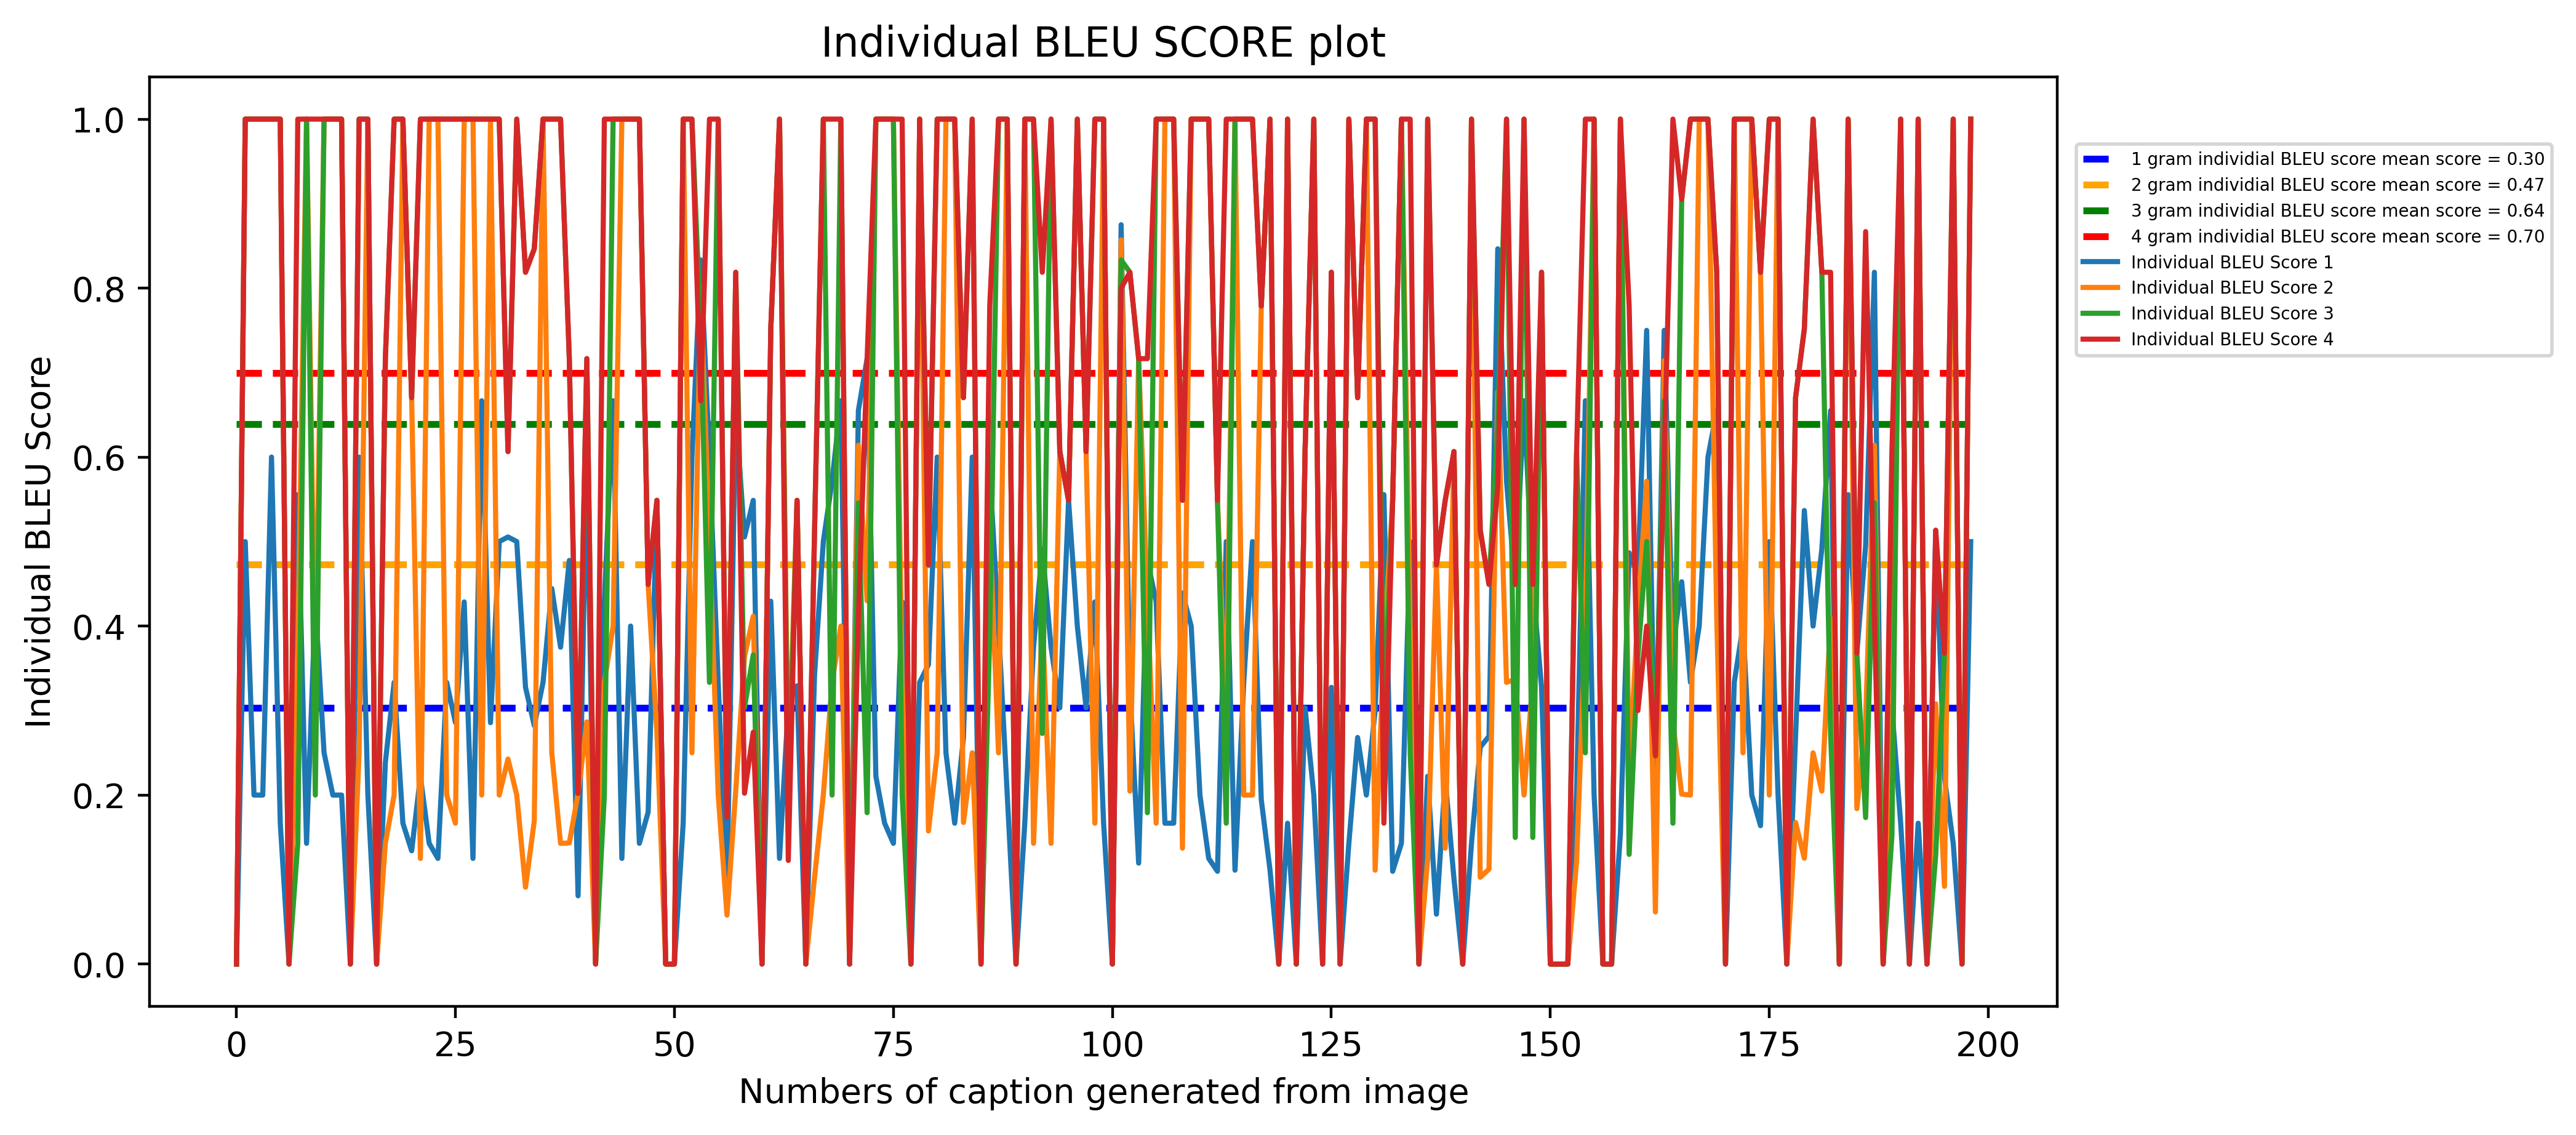

In [119]:
plt.figure(figsize=(10,5),dpi=400)
ib1m = [np.mean(iscore1gram)]*len(iscore1gram)
ib2m = [np.mean(iscore2gram)]*len(iscore2gram)
ib3m = [np.mean(iscore3gram)]*len(iscore3gram)
ib4m = [np.mean(iscore4gram)]*len(iscore4gram)


plt.plot(ib1m ,label="1 gram individial BLEU score mean score = 0.30", linewidth=2, linestyle='dashed', color='blue')
plt.plot(ib2m ,label="2 gram individial BLEU score mean score = 0.47", linewidth=2, linestyle='dashed', color='orange')
plt.plot(ib3m ,label="3 gram individial BLEU score mean score = 0.64", linewidth=2, linestyle='dashed', color='green')
plt.plot(ib4m ,label="4 gram individial BLEU score mean score = 0.70", linewidth=2, linestyle='dashed', color='red')


plt.plot(iscore1gram, label='Individual BLEU Score 1')
plt.plot(iscore2gram, label="Individual BLEU Score 2")
plt.plot(iscore3gram, label="Individual BLEU Score 3")
plt.plot(iscore4gram, label="Individual BLEU Score 4")
plt.xlabel('Numbers of caption generated from image')
plt.ylabel('Individual BLEU Score')
plt.title('Individual BLEU SCORE plot')
plt.legend(loc=(1.01,0.7),prop={'size': 5});

In [63]:
ib4m


[0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456039112,
 0.6998424456

In [68]:
cscore1gram = []
cscore2gram = []
cscore3gram = []
cscore4gram = []
for i in range(199):
  cscore1gram.append(bleu.sentence_bleu([reference[i]], candidate[i], weights=(1,0,0,0)))
  cscore2gram.append(bleu.sentence_bleu([reference[i]], candidate[i], weights=(0.5,0.5,0,0)))
  cscore3gram.append(bleu.sentence_bleu([reference[i]], candidate[i], weights=(0.33,0.33,0.33,0)))
  cscore4gram.append(bleu.sentence_bleu([reference[i]], candidate[i], weights=(0.25,0.25,0.25,0.25)))


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


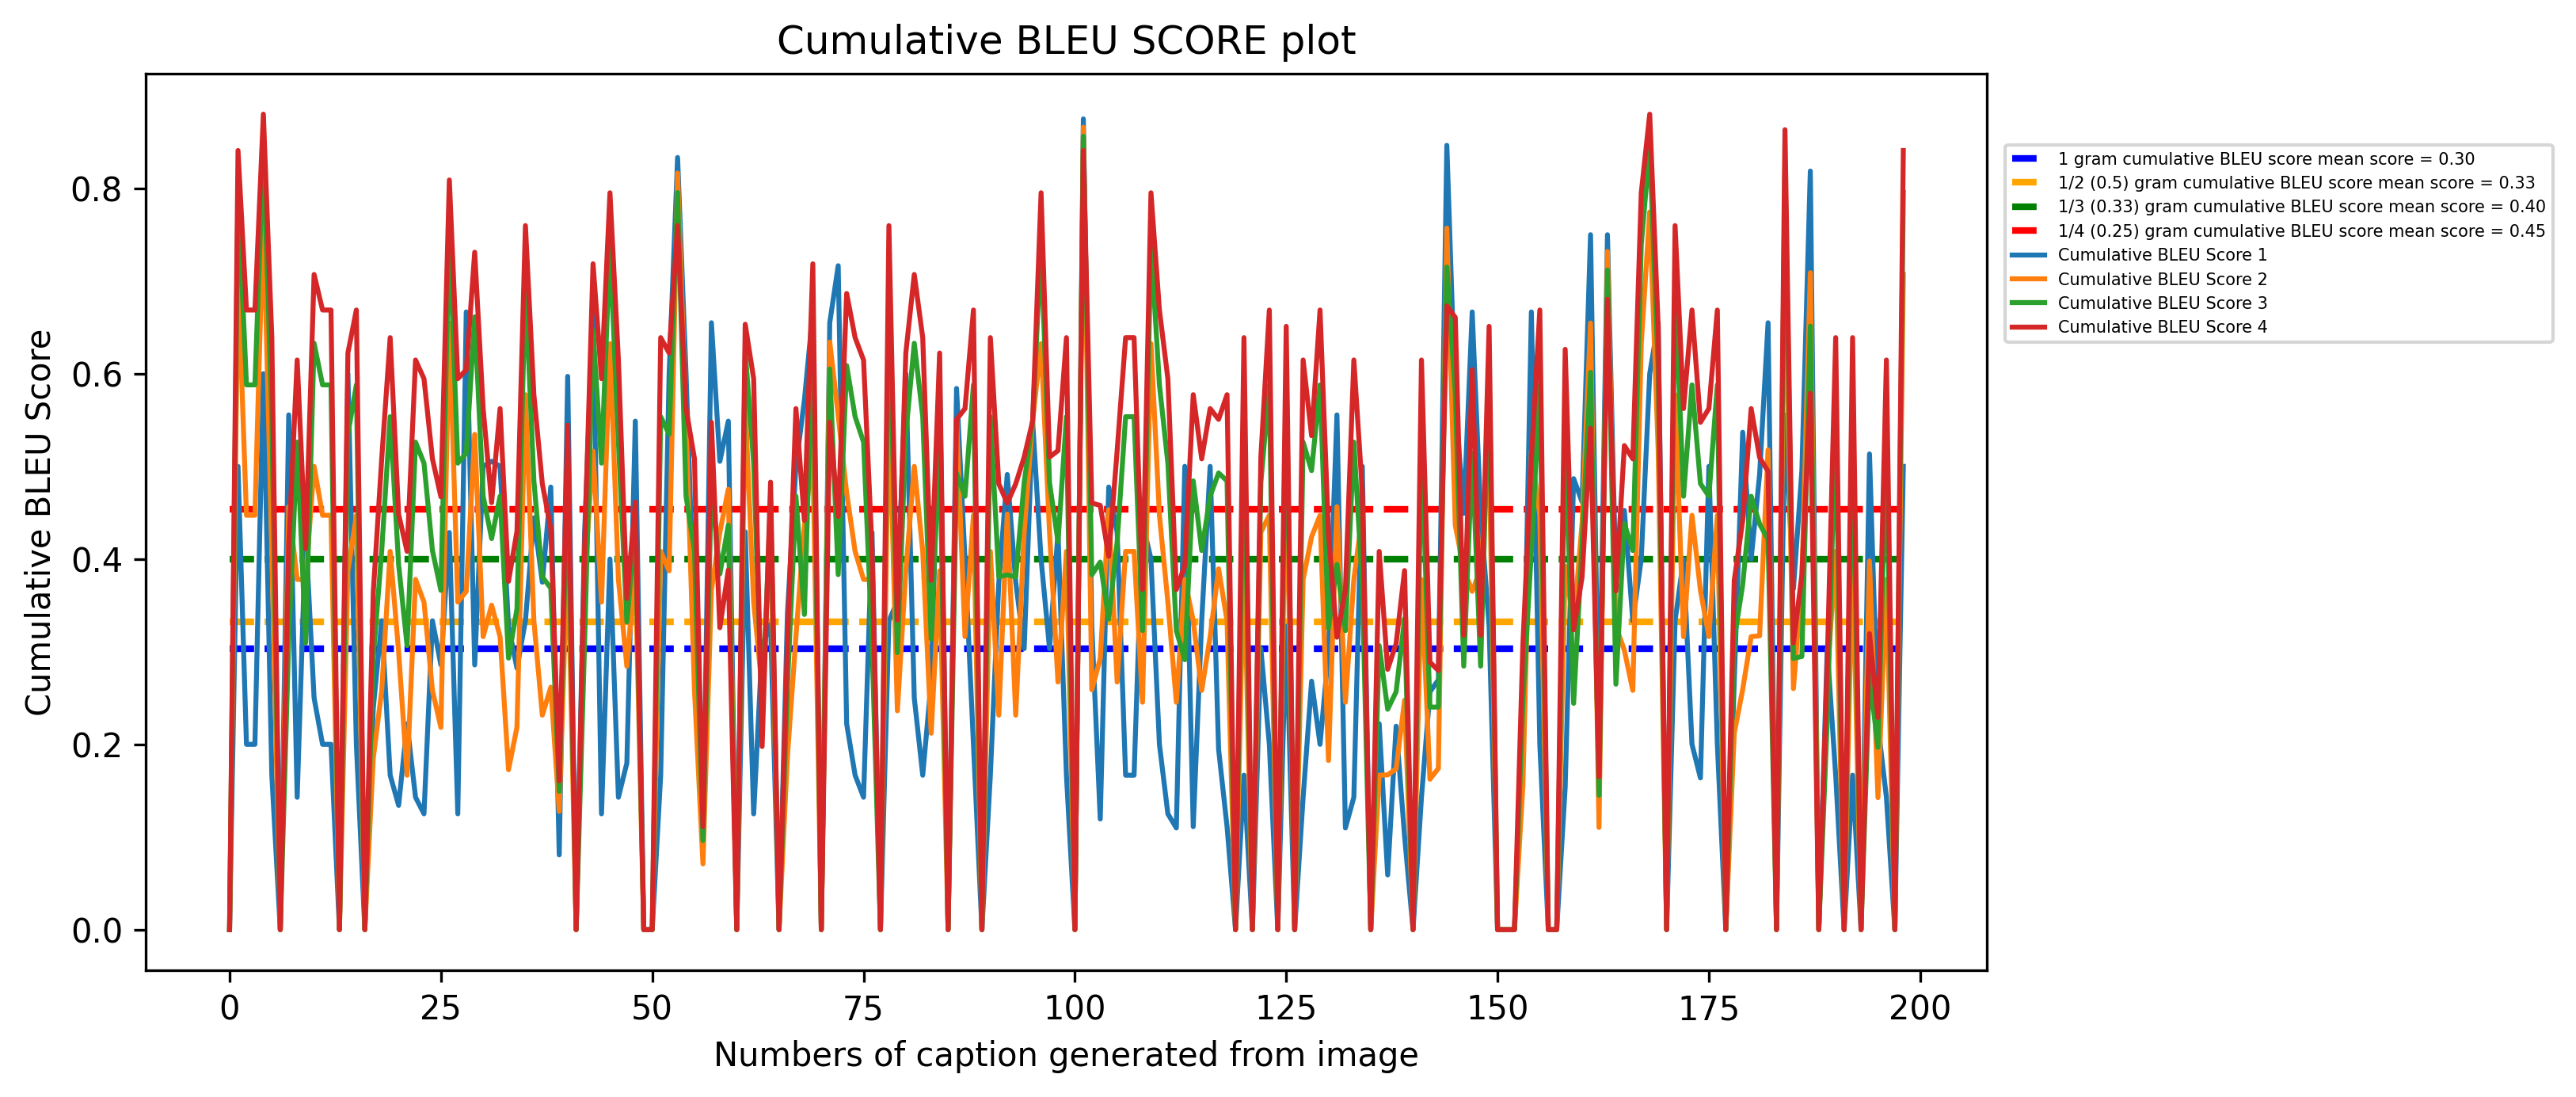

In [118]:
plt.figure(figsize=(10,5),dpi=300)
cb1m = [np.mean(cscore1gram)]*len(cscore1gram)
cb2m = [np.mean(cscore2gram)]*len(cscore2gram)
cb3m = [np.mean(cscore3gram)]*len(cscore3gram)
cb4m = [np.mean(cscore4gram)]*len(cscore4gram)


plt.plot(cb1m ,label="1 gram cumulative BLEU score mean score = 0.30", linewidth=2, linestyle='dashed', color='blue')
plt.plot(cb2m ,label="1/2 (0.5) gram cumulative BLEU score mean score = 0.33", linewidth=2, linestyle='dashed', color='orange')
plt.plot(cb3m ,label="1/3 (0.33) gram cumulative BLEU score mean score = 0.40", linewidth=2, linestyle='dashed', color='green')
plt.plot(cb4m ,label="1/4 (0.25) gram cumulative BLEU score mean score = 0.45", linewidth=2, linestyle='dashed', color='red')


plt.plot(cscore1gram, label='Cumulative BLEU Score 1')
plt.plot(cscore2gram, label="Cumulative BLEU Score 2")
plt.plot(cscore3gram, label="Cumulative BLEU Score 3")
plt.plot(cscore4gram, label="Cumulative BLEU Score 4")
plt.xlabel('Numbers of caption generated from image')
plt.ylabel('Cumulative BLEU Score')
plt.title('Cumulative BLEU SCORE plot')
plt.legend(loc=(1.01,0.7),prop={'size': 5});

In [80]:
cb4m

[0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384409259,
 0.4534623384

In [92]:
data[data['confidence score']>1] = 0.61

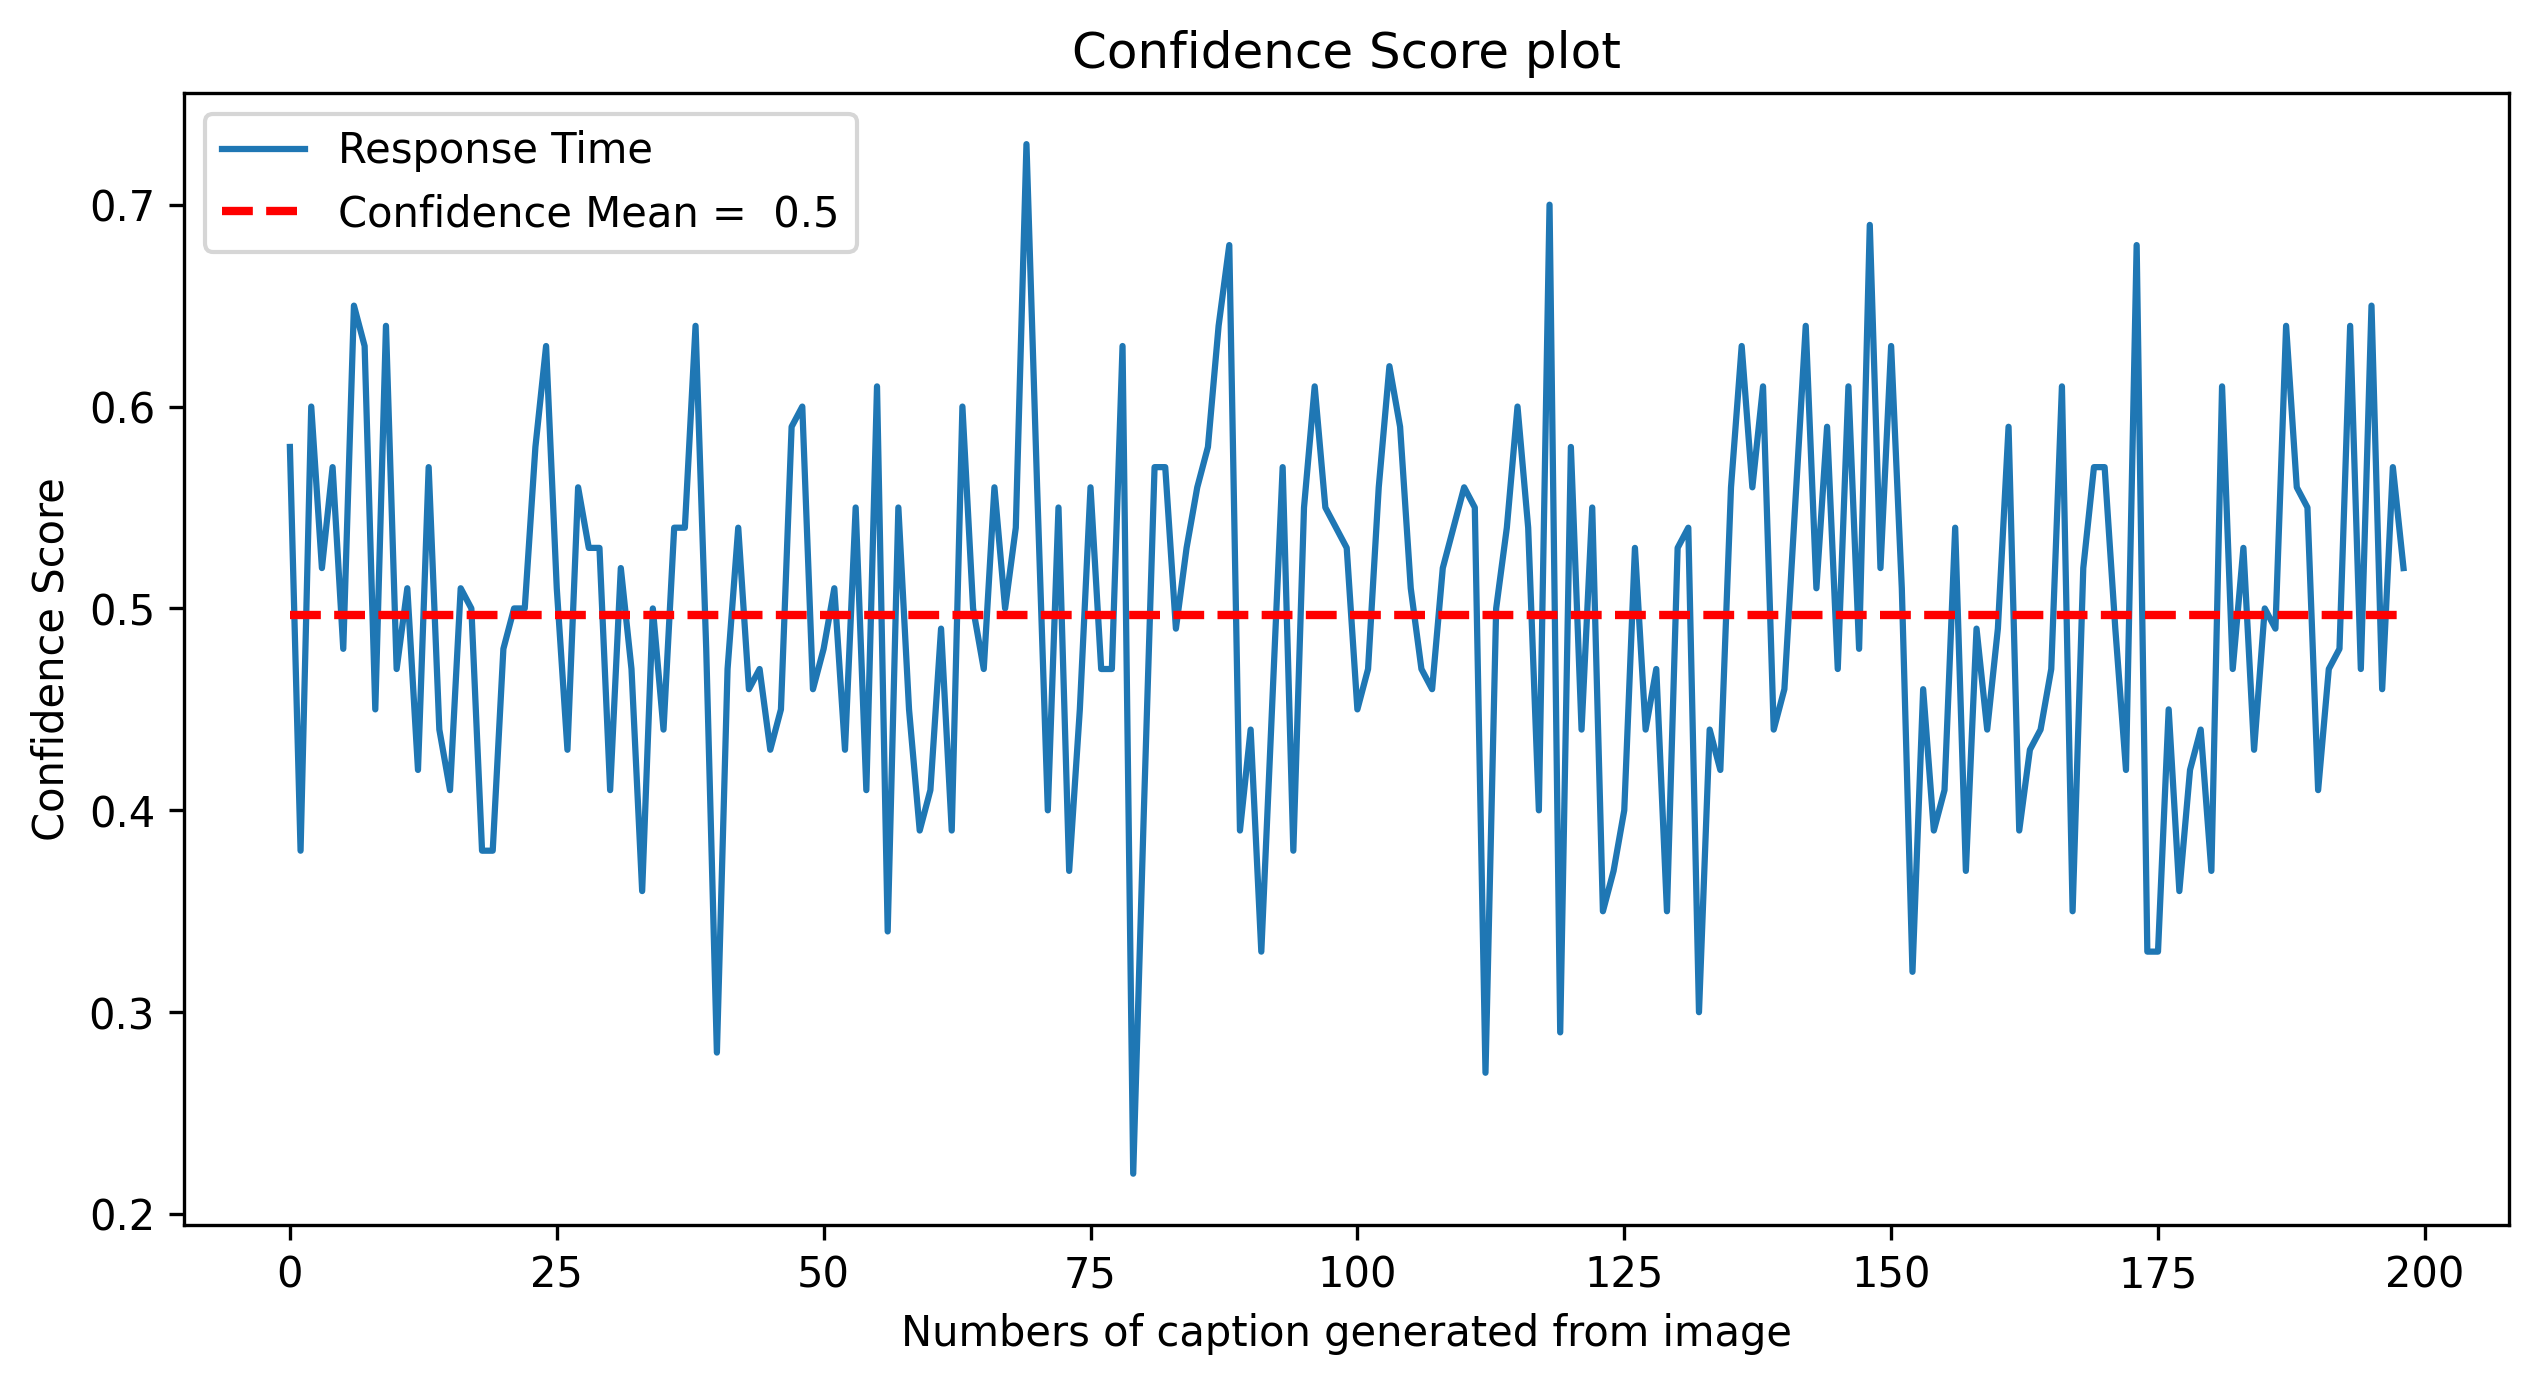

In [110]:
plt.figure(figsize=(10,5),dpi=300)
conf_mean = [np.mean(data['confidence score'])]*len(data['confidence score'])
#y_mean = [np.mean(y)]*len(x)
plt.plot(data['confidence score'], label="Response Time")

plt.plot(conf_mean ,label="Confidence Mean =  0.5", linewidth=2, linestyle='dashed', color='red')
plt.xlabel("Numbers of caption generated from image")
plt.ylabel("Confidence Score")
plt.title("Confidence Score plot")
plt.legend();


In [94]:
conf_mean

[0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.49668341708542696,
 0.4966834

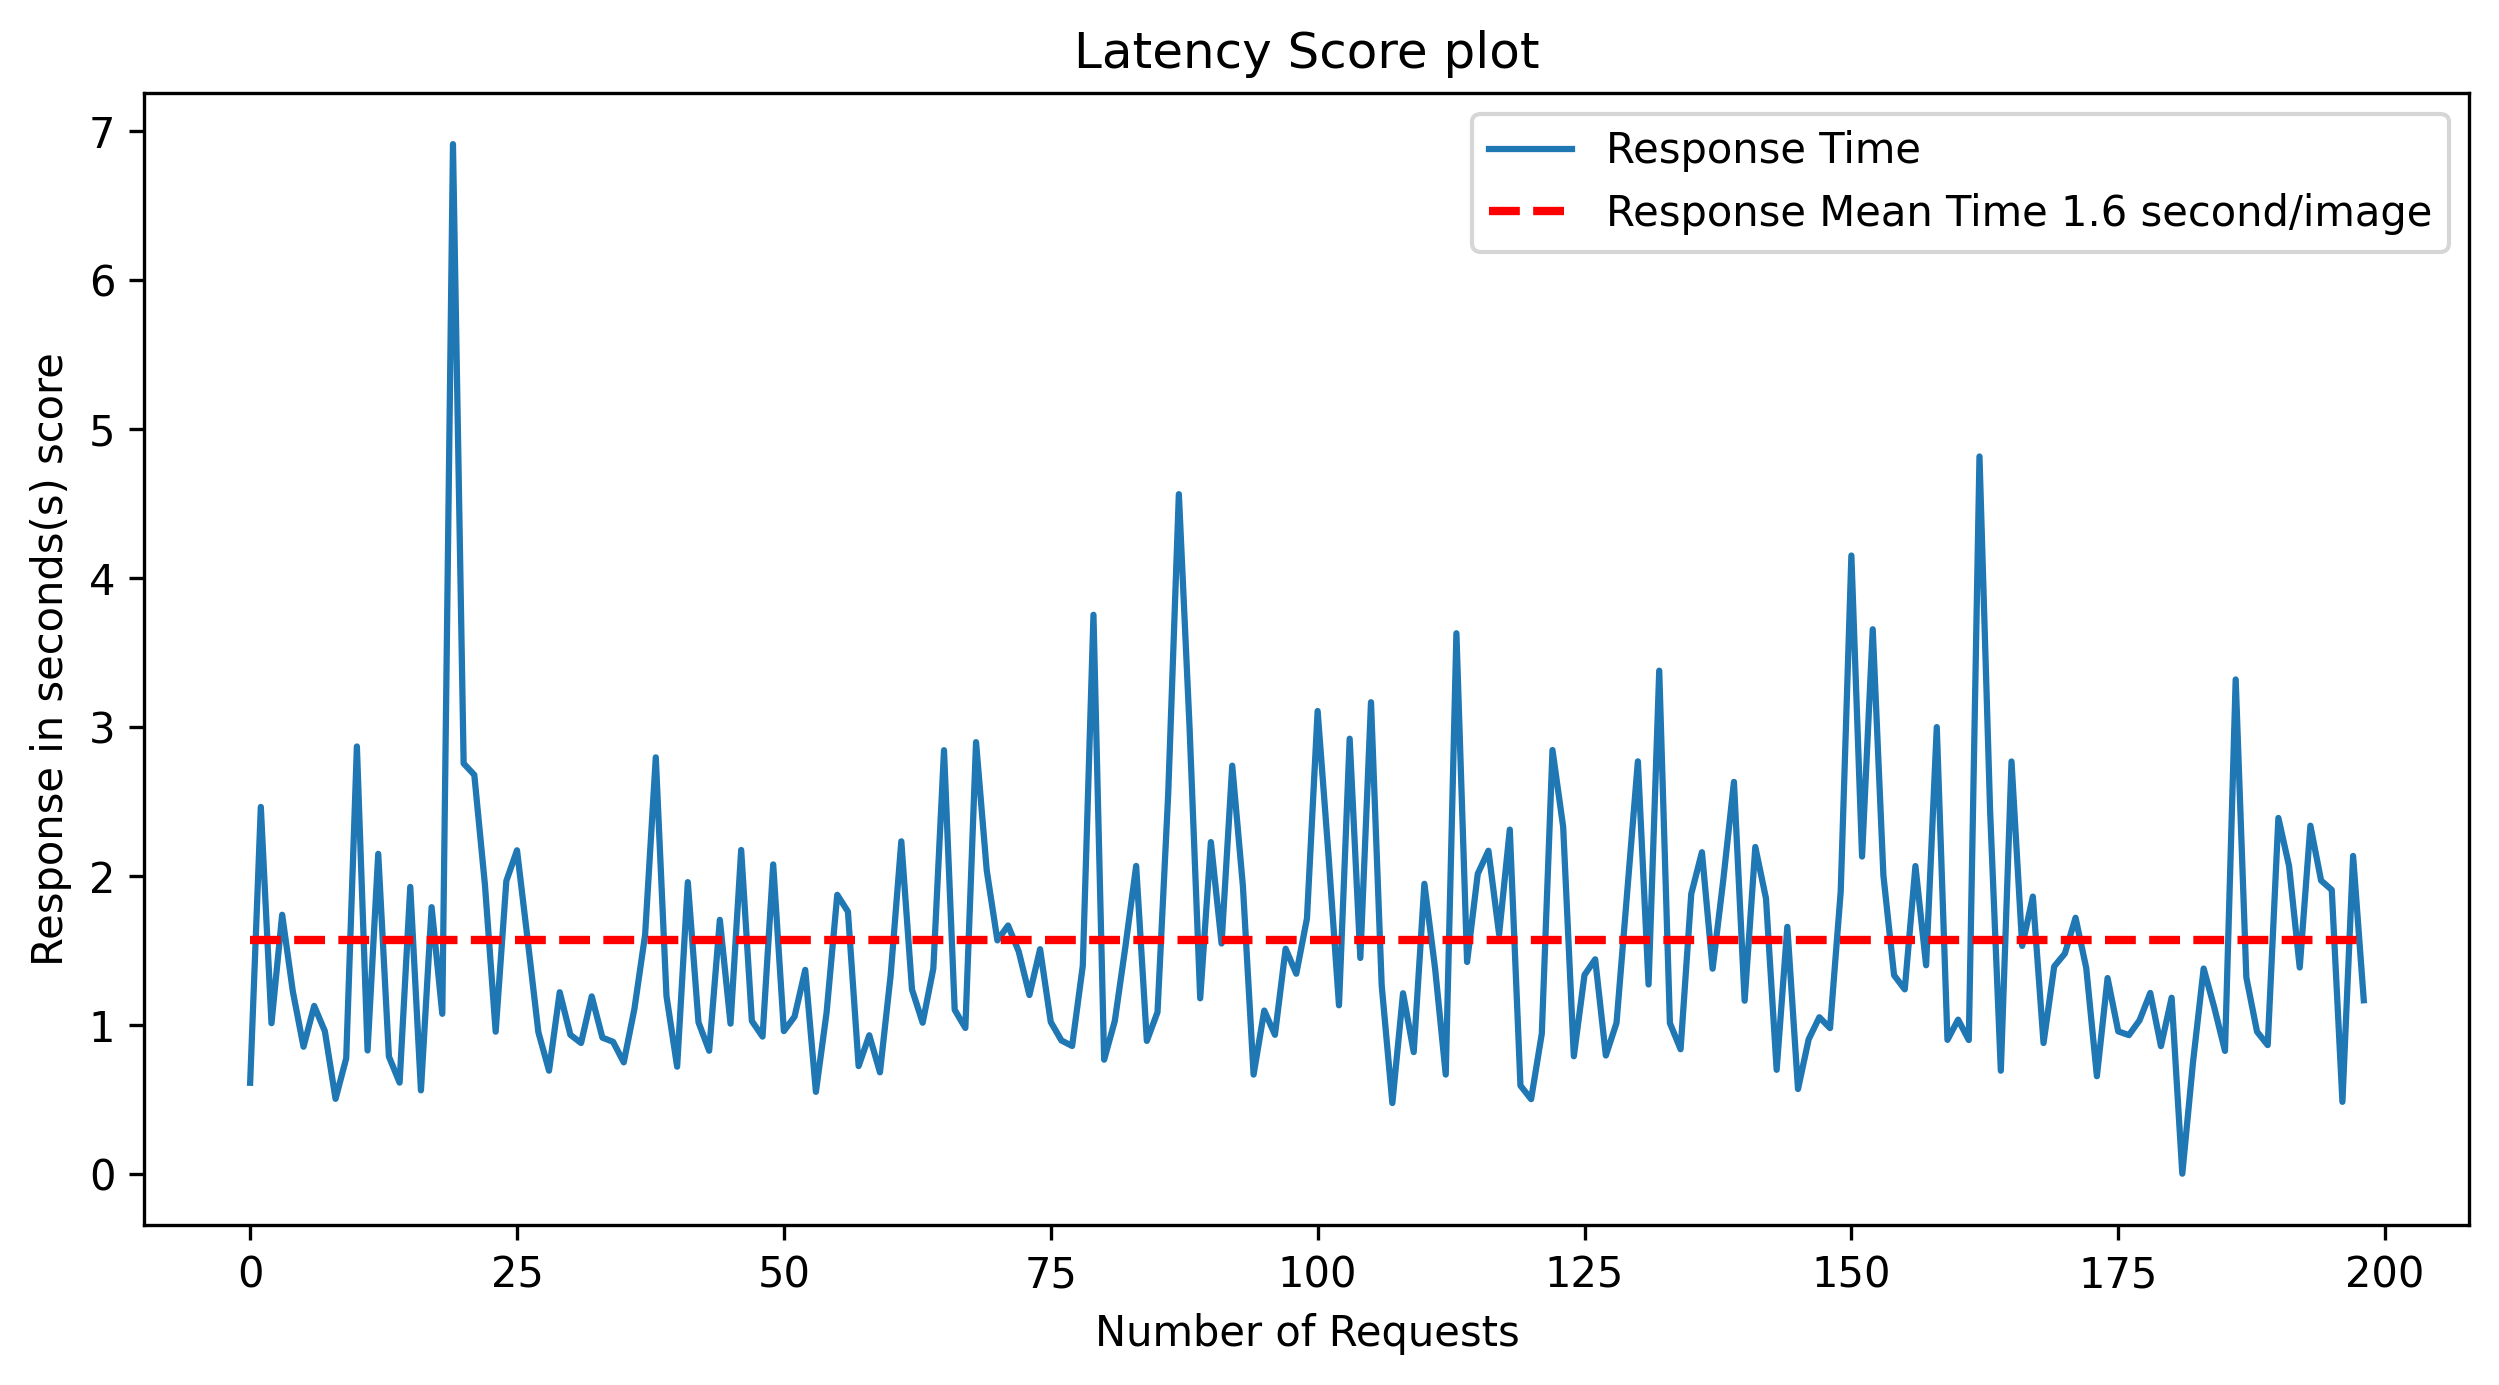

In [109]:
plt.figure(figsize=(10,5),dpi=300)
lp = data['latency']/1000
lm = [np.mean(lp)]*len(lp)
#y_mean = [np.mean(y)]*len(x)
plt.plot(lp, label="Response Time")

plt.plot(lm ,label="Response Mean Time 1.6 second/image", linewidth=2, linestyle='dashed', color='red')
plt.xlabel("Number of Requests")
plt.ylabel("Response in seconds(s) score")
plt.title("Latency Score plot")
plt.legend();


In [107]:
lm


[1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
 1.567364874371859,
